In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# some date fields are empty, if that is the case return None which transforms to NaT in Pandas
date_parser = lambda x: None if type(x) == float else datetime.strptime(x, "%Y/%m/%d")
df = pd.read_csv("./COVID-19_Case_Surveillance_Public_Use_Data.csv", 
                 low_memory=False, 
                 parse_dates=["cdc_report_dt", "pos_spec_dt", "onset_dt"], 
                 date_parser=date_parser)

In [3]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-07-03,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020-05-27,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,Missing,No,Missing
2,2020-06-06,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
3,2020-06-28,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020-07-06,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668175 entries, 0 to 2668174
Data columns (total 11 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   cdc_report_dt                  datetime64[ns]
 1   pos_spec_dt                    datetime64[ns]
 2   onset_dt                       datetime64[ns]
 3   current_status                 object        
 4   sex                            object        
 5   age_group                      object        
 6   Race and ethnicity (combined)  object        
 7   hosp_yn                        object        
 8   icu_yn                         object        
 9   death_yn                       object        
 10  medcond_yn                     object        
dtypes: datetime64[ns](3), object(8)
memory usage: 223.9+ MB


In [5]:
df_clean = df.copy()

In [6]:
df_clean["hosp_yn"] # this data is not easy to work with so we should make it easier to use

0          Missing
1               No
2          Missing
3          Missing
4          Missing
            ...   
2668170        Yes
2668171    Missing
2668172         No
2668173    Unknown
2668174        Yes
Name: hosp_yn, Length: 2668175, dtype: object

In [7]:
# convert unknown and missing to -1 then no to 0 and yes to 1
def clean_to_number(key, df_raw):
    df = df_raw.copy()
    df[key] = df[key].replace("Missing", -1)
    df[key] = df[key].replace("Unknown", -1)
    df[key] = df[key].replace("No", 0)
    df[key] = df[key].replace("Yes", 1)
    return df

In [8]:
df_clean = clean_to_number("hosp_yn", df_clean)
df_clean = clean_to_number("icu_yn", df_clean)
df_clean = clean_to_number("death_yn", df_clean)
df_clean = clean_to_number("medcond_yn", df_clean)

In [9]:
df_clean.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-07-03,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1
1,2020-05-27,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",0,-1,0,-1
2,2020-06-06,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1
3,2020-06-28,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1
4,2020-07-06,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1


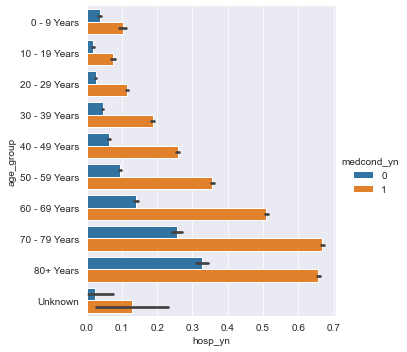

In [109]:
# Hospitalized by age and medical condition
pp = sns.catplot(data=df_clean.query('hosp_yn != -1 & medcond_yn != -1'), 
                  hue='medcond_yn',
                  x="hosp_yn",
                  y="age_group",
                  height=5,
                  kind="bar")
pp.savefig("./results/hospitalized_by_age_group.png")

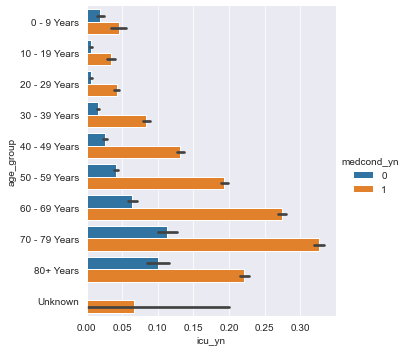

In [108]:
# ICU by age and medical condition
pp = sns.catplot(data=df_clean.query('icu_yn != -1 & medcond_yn != -1'), 
                  hue='medcond_yn',
                  x="icu_yn",
                  y="age_group",
                  height=5,
                  kind="bar")
pp.savefig("./results/icu_by_age_group.png")

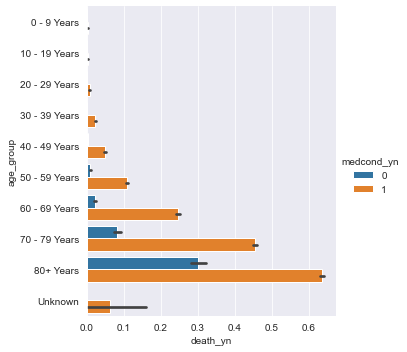

In [107]:
# Death by age and medical condition
pp = sns.catplot(data=df_clean.query('death_yn != -1 & medcond_yn != -1'), 
                  hue='medcond_yn',
                  x="death_yn",
                  y="age_group",
                  height=5,
                  kind="bar")
pp.savefig("./results/death_by_age_group.png")

In [47]:
df_clean.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-07-03,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1
1,2020-05-27,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",0,-1,0,-1
2,2020-06-06,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1
3,2020-06-28,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1
4,2020-07-06,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",-1,-1,-1,-1


#### CASES BY DATE ANALYZE

In [10]:
def get_entries_per_date(df):
    dates = df["cdc_report_dt"]
    hash_map = dict()
    for date in dates:
        c = hash_map.get(date)
        if c:
            hash_map[date] = c+1
        else:
            hash_map[date] = 1
    return hash_map

In [11]:
hash_map_dates = get_entries_per_date(df_clean)

In [12]:
# sort by date
hash_map_dates = {key: value for key, value in sorted(hash_map_dates.items(), key=lambda item: item[0])}

In [13]:
hash_map_dates

{Timestamp('2020-01-01 00:00:00'): 1,
 Timestamp('2020-01-22 00:00:00'): 1,
 Timestamp('2020-01-23 00:00:00'): 1,
 Timestamp('2020-01-27 00:00:00'): 1,
 Timestamp('2020-01-28 00:00:00'): 1,
 Timestamp('2020-01-29 00:00:00'): 3,
 Timestamp('2020-01-31 00:00:00'): 1,
 Timestamp('2020-02-02 00:00:00'): 3,
 Timestamp('2020-02-05 00:00:00'): 2,
 Timestamp('2020-02-06 00:00:00'): 1,
 Timestamp('2020-02-10 00:00:00'): 1,
 Timestamp('2020-02-11 00:00:00'): 1,
 Timestamp('2020-02-17 00:00:00'): 26,
 Timestamp('2020-02-18 00:00:00'): 6,
 Timestamp('2020-02-19 00:00:00'): 2,
 Timestamp('2020-02-20 00:00:00'): 3,
 Timestamp('2020-02-25 00:00:00'): 11,
 Timestamp('2020-02-27 00:00:00'): 1,
 Timestamp('2020-02-28 00:00:00'): 2,
 Timestamp('2020-03-01 00:00:00'): 8,
 Timestamp('2020-03-02 00:00:00'): 8,
 Timestamp('2020-03-03 00:00:00'): 11,
 Timestamp('2020-03-04 00:00:00'): 9,
 Timestamp('2020-03-05 00:00:00'): 28,
 Timestamp('2020-03-06 00:00:00'): 42,
 Timestamp('2020-03-07 00:00:00'): 80,
 Times

In [14]:
def prep_dates_for_model(dates):
    return np.array( list(map(lambda date: datetime.timestamp(date), dates)) )

In [15]:
X = prep_dates_for_model(list(hash_map_dates.keys()))
X = X.reshape((len(X),1))

In [16]:
X

array([[1.5778260e+09],
       [1.5796404e+09],
       [1.5797268e+09],
       [1.5800724e+09],
       [1.5801588e+09],
       [1.5802452e+09],
       [1.5804180e+09],
       [1.5805908e+09],
       [1.5808500e+09],
       [1.5809364e+09],
       [1.5812820e+09],
       [1.5813684e+09],
       [1.5818868e+09],
       [1.5819732e+09],
       [1.5820596e+09],
       [1.5821460e+09],
       [1.5825780e+09],
       [1.5827508e+09],
       [1.5828372e+09],
       [1.5830100e+09],
       [1.5830964e+09],
       [1.5831828e+09],
       [1.5832692e+09],
       [1.5833556e+09],
       [1.5834420e+09],
       [1.5835284e+09],
       [1.5836148e+09],
       [1.5837012e+09],
       [1.5837876e+09],
       [1.5838740e+09],
       [1.5839604e+09],
       [1.5840468e+09],
       [1.5841332e+09],
       [1.5842196e+09],
       [1.5843060e+09],
       [1.5843924e+09],
       [1.5844788e+09],
       [1.5845652e+09],
       [1.5846516e+09],
       [1.5847380e+09],
       [1.5848244e+09],
       [1.584910

In [17]:
def cumilative_sum_cases(new_cases_by_date):
    i = 0
    till = len(new_cases_by_date)
    total_cases_by_date = []
    while i < till:
        if i == 0:
            total_cases_by_date.append(new_cases_by_date[0])
        else:
            total_cases_by_date.append(total_cases_by_date[i-1] + new_cases_by_date[i])
        i += 1
    return total_cases_by_date

In [20]:
y = list(hash_map_dates.values())
y = cumilative_sum_cases(y)

In [21]:
y

[1,
 2,
 3,
 4,
 5,
 8,
 9,
 12,
 14,
 15,
 16,
 17,
 43,
 49,
 51,
 54,
 65,
 66,
 68,
 76,
 84,
 95,
 104,
 132,
 174,
 254,
 312,
 402,
 537,
 663,
 885,
 1379,
 1791,
 2502,
 4037,
 5186,
 7265,
 9324,
 13235,
 15314,
 17242,
 21047,
 35515,
 46281,
 58131,
 72373,
 84282,
 91605,
 110325,
 128674,
 146099,
 157470,
 168513,
 194087,
 216103,
 234244,
 284024,
 312451,
 332898,
 347526,
 379148,
 392157,
 418851,
 430250,
 453997,
 491506,
 503244,
 539494,
 552432,
 578696,
 600080,
 639351,
 670433,
 689132,
 705805,
 724268,
 746017,
 773439,
 804275,
 817840,
 838456,
 859835,
 882447,
 896455,
 929929,
 945414,
 968893,
 985204,
 1007579,
 1021346,
 1035401,
 1068460,
 1103192,
 1114516,
 1136794,
 1151863,
 1171731,
 1190938,
 1202536,
 1223178,
 1258342,
 1271170,
 1294823,
 1317170,
 1330698,
 1350570,
 1374189,
 1391200,
 1414345,
 1428203,
 1437035,
 1447679,
 1474991,
 1495888,
 1510688,
 1544641,
 1551711,
 1559808,
 1568826,
 1582370,
 1618503,
 1635182,
 1660186,
 167

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Polynomial Linear regression - 3rd degree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)

In [125]:
# Polynomial Linear regression - 4th degree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)

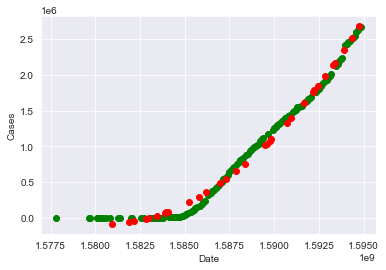

In [126]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(X_train[:, 0], y_train, color='g')
ax.scatter(X_test[:, 0], y_pred, color='r')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.savefig("results/actual_vs_test_cases.png")

In [103]:
dates_to_predict = [datetime.strptime("2020-08-02", "%Y-%m-%d")]
unix_dates_to_predict = prep_dates_for_model(dates_to_predict)
unix_dates_to_predict_poly = poly_reg.transform([unix_dates_to_predict])
predict_single_case = lin_reg.predict(unix_dates_to_predict_poly)

In [104]:
predict_single_case

array([3319824.00396252])

In [94]:
import time
def generate_from_to_days(from_from_today, to_from_today ):
    now = time.time()
    day = 86400
    dates = []
    for i in range(from_from_today, to_from_today):
        dates.append(now + day*i)
    return np.array(dates)

In [105]:
future_dates = generate_from_to_days(-20, 120)
future_dates = future_dates.reshape(len(future_dates), 1)
future_dates_to_predict_poly = poly_reg.transform(future_dates)
predict_cases = lin_reg.predict(future_dates_to_predict_poly)

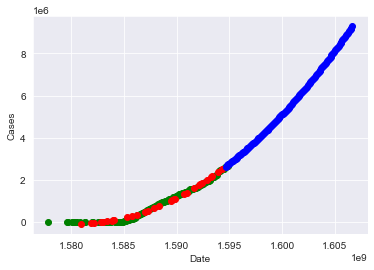

In [127]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(X_train[:, 0], y_train, color='g')
ax.scatter(X_test[:, 0], y_pred, color='r')
ax.scatter(future_dates[:, 0], predict_cases, color='b')
plt.xlabel('Date')
plt.ylabel('Cases')
fig.savefig("results/future_predictions.png")